In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


# Import esentiel libraries and packages:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Datasets:

In [3]:
train=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
display(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
display(test)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
def date_type(df):
    '''change the date column in a data frame to datetime'''
    df = df.copy()
    df['date']= pd.to_datetime(df['date'])
    return df

In [6]:
train=date_type(train)
test=date_type(test)

In [7]:
def extract_datetime_features(df):
    '''Extracting some datetime features 
    like year, month, day of month, and day of week'''
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayOfMonth'] = df['date'].dt.day
    df['dayOfWeek'] = df['date'].dt.dayofweek
    return df

In [8]:
train=extract_datetime_features(train)
test=extract_datetime_features(test)

# Visualize train data (Sale by the date "scatter plot"):

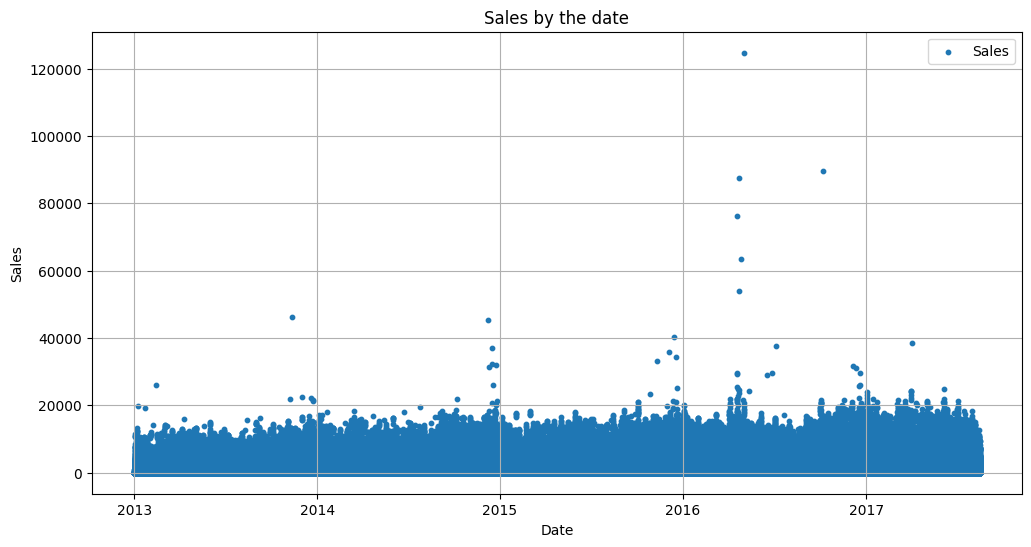

In [9]:
# Plot the time series as a scatter plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(train['date'], train['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the date')
plt.legend()
plt.grid(True)
plt.show()

* We can see that there is some outliers  
* We have to do more invastigations to check if this outliers are by fault or real because of some events

* We can see a trend with the data (where the sales are more each year and this is common in time series problems)

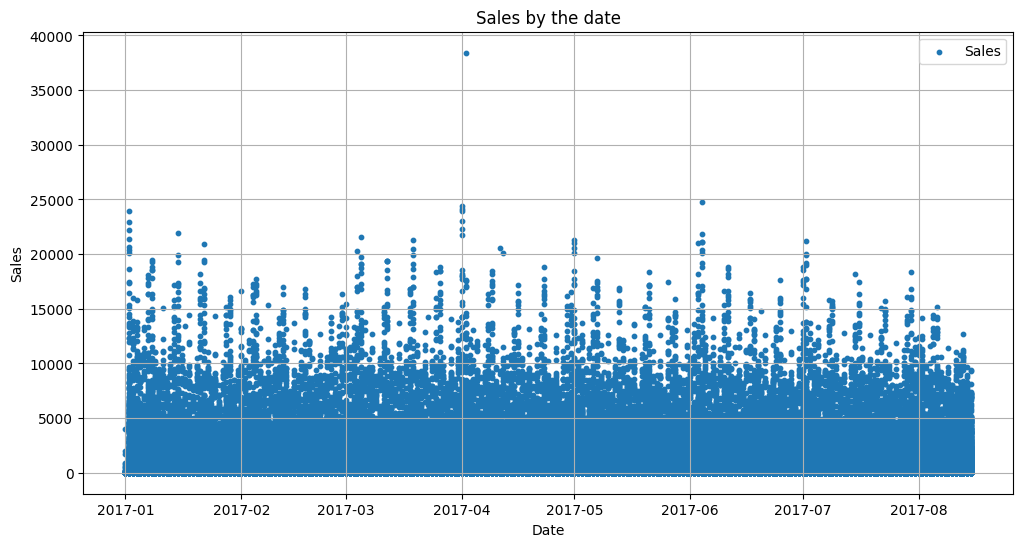

In [10]:
# for specific range of dates
df = train.copy()
df = df[df['date']>='01-01-2017']

# Plot the time series as a scatter plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(df['date'], df['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the date')
plt.legend()
plt.grid(True)
plt.show()

# Read other Datasets for more context and features:

## 1. merge train and test datasets

In [11]:
df=pd.concat([train, test]).reset_index(drop=True)
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3


## 2. Get new dataframes:

In [12]:
# read dataframes
holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

# transfer date to datetime type
holidays=date_type(holidays)
oil=date_type(oil)

# show dataframes
display(holidays)
display(oil)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


## 2.1 clean holidays dataframe:

In [13]:
# get rid of unnecessary columns
holidays.drop(columns=['description','locale_name'], inplace=True) # locale_name for now until we check stores dataset

In [14]:
holidays.isna().sum()

date           0
type           0
locale         0
transferred    0
dtype: int64

## 2.2 clean oil dataframe:

#### handling nan:

In [15]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [16]:
oil[oil['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


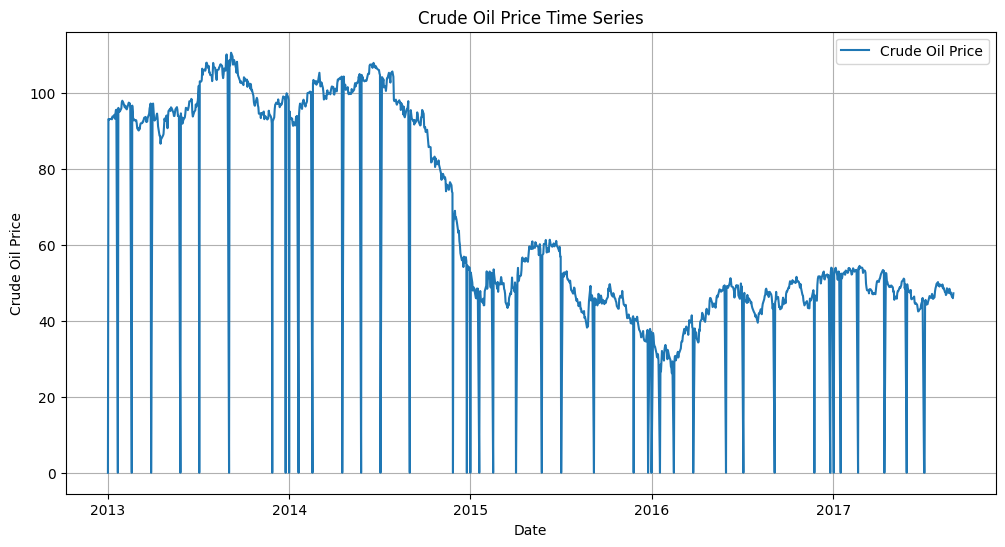

In [17]:
def plot_oil_with_nan(oil):
    '''To Plot oil prices with nan as 0 and not changing real oil dataframe'''
    # copy oil so its private var and wont change real oil dataframe
    oil = oil.copy()
    
    # Fill NaN values in 'dcoilwtico' with a specified value, e.g., 0
    oil['dcoilwtico'].fillna(0, inplace=True)

    # Plot the 'date' against 'dcoilwtico' as a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(oil['date'], oil['dcoilwtico'], label='Crude Oil Price')
    plt.xlabel('Date')
    plt.ylabel('Crude Oil Price')
    plt.title('Crude Oil Price Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_oil_with_nan(oil)

* We can see that those missing values are just because of censors or problem with the dataframe.
* We can fill those values with average of the two adjacent values to it.

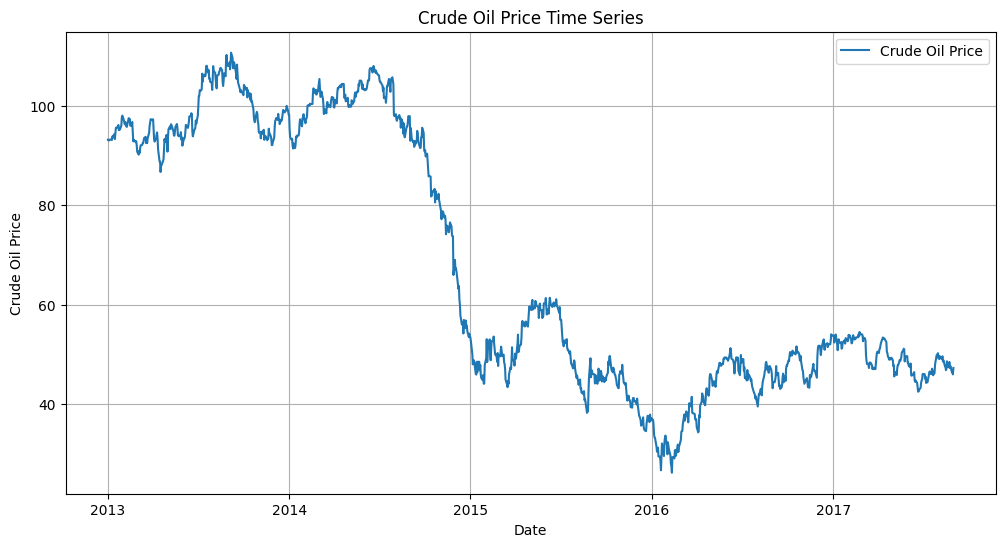

In [18]:
oil['dcoilwtico'].fillna(method='ffill', inplace=True)
oil['dcoilwtico'].fillna(method='bfill', inplace=True)

# Plot the 'date' against 'dcoilwtico' as a line graph
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'], label='Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Time Series')
plt.legend()
plt.grid(True)
plt.show()

## 3. Mergre the new dataframes with the df:

### 3.1 Merge with holidays dataframe:

In [19]:
df = df.merge(holidays,how='left',on='date')
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,type,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3,NaN,NaN,NaN


### 3.2 Merge with oil dataframe:

In [20]:
df = df.merge(oil,how='left',on='date')
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,type,locale,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,False,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,False,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,False,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,False,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3,NaN,NaN,NaN,47.26
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3,NaN,NaN,NaN,47.26
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3,NaN,NaN,NaN,47.26
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3,NaN,NaN,NaN,47.26


# One hot encoding:

In [21]:
def get_unique(df,column_name):
    '''Get the all values and the count for specific column'''
    unique_values_count = df[column_name].nunique()
    unique_values = df[column_name].unique()

    print(f"Number of unique values in {column_name}: {unique_values_count}")
    print("Unique values:")
    for value in unique_values:
        print(value)

In [22]:
df = pd.get_dummies(df, columns=['family'], dummy_na=False, prefix='family')

df = pd.get_dummies(df, columns=['type'], dummy_na=False, prefix='holidayType')
df = pd.get_dummies(df, columns=['locale'], dummy_na=False, prefix='holidayLocale')
df = pd.get_dummies(df, columns=['transferred'], dummy_na=False, prefix='holidayTransferred')

In [23]:
df

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,dcoilwtico,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True
0,0,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
1,1,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
2,2,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
3,3,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
4,4,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,NaN,1,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082856,3029396,2017-08-31,9,NaN,0,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082857,3029397,2017-08-31,9,NaN,1,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082858,3029398,2017-08-31,9,NaN,9,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False


# Check for nan in df:

In [24]:
df.isna().sum()

id                                        0
date                                      0
store_nbr                                 0
sales                                 28512
onpromotion                               0
year                                      0
month                                     0
dayOfMonth                                0
dayOfWeek                                 0
dcoilwtico                           885654
family_AUTOMOTIVE                         0
family_BABY CARE                          0
family_BEAUTY                             0
family_BEVERAGES                          0
family_BOOKS                              0
family_BREAD/BAKERY                       0
family_CELEBRATION                        0
family_CLEANING                           0
family_DAIRY                              0
family_DELI                               0
family_EGGS                               0
family_FROZEN FOODS                       0
family_GROCERY I                

* the sales nan are just because of the test set.
* the oil price is problem we need to fix it, its because some values was not contained in the oil price dataframe
* we can fill them with adjacents

In [25]:
new_oil=df[['date','dcoilwtico']].drop_duplicates(subset='date', keep="first").reset_index(drop=True)
print(new_oil.shape)
print(new_oil.isna().sum())

(1700, 2)
date            0
dcoilwtico    485
dtype: int64


* We fill them with the same way as before with adjacent values

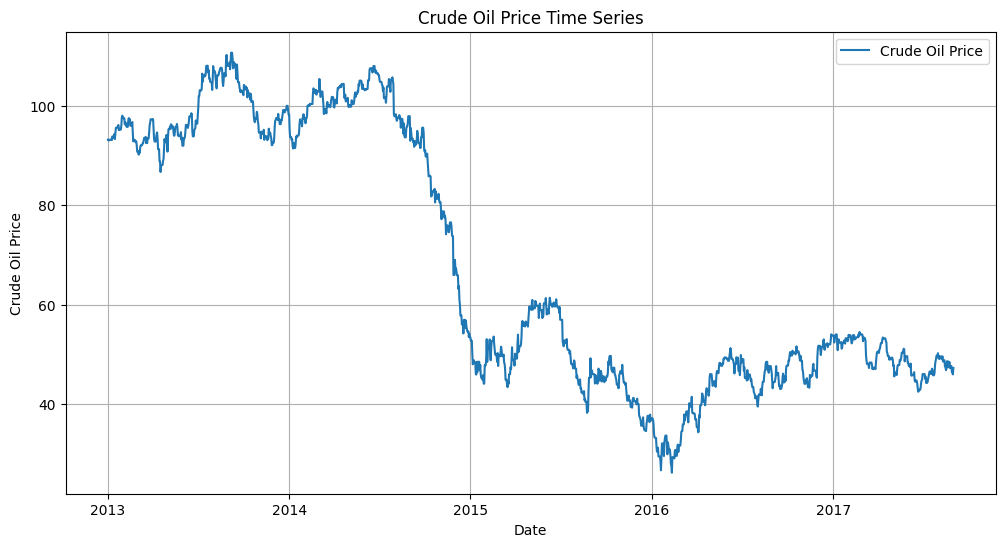

In [26]:
new_oil['dcoilwtico'].fillna(method='ffill', inplace=True)
new_oil['dcoilwtico'].fillna(method='bfill', inplace=True)

# Plot the 'date' against 'dcoilwtico' as a line graph
plt.figure(figsize=(12, 6))
plt.plot(new_oil['date'], new_oil['dcoilwtico'], label='Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(new_oil.isna().sum())

date          0
dcoilwtico    0
dtype: int64


* Now we can merge back our new_oil dataframe with the df

In [28]:
df=df.drop(columns=['dcoilwtico']) # remove the old column from df before merging with the new_oil
df = df.merge(new_oil,how='left',on='date')
display(df)

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
0,0,2013-01-01,1,0.0,0,2013,1,1,1,True,...,False,True,False,False,False,True,False,True,False,93.14
1,1,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
2,2,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
3,3,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
4,4,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082856,3029396,2017-08-31,9,NaN,0,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082857,3029397,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082858,3029398,2017-08-31,9,NaN,9,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26


In [29]:
print(df.isna().sum())

id                                       0
date                                     0
store_nbr                                0
sales                                28512
onpromotion                              0
year                                     0
month                                    0
dayOfMonth                               0
dayOfWeek                                0
family_AUTOMOTIVE                        0
family_BABY CARE                         0
family_BEAUTY                            0
family_BEVERAGES                         0
family_BOOKS                             0
family_BREAD/BAKERY                      0
family_CELEBRATION                       0
family_CLEANING                          0
family_DAIRY                             0
family_DELI                              0
family_EGGS                              0
family_FROZEN FOODS                      0
family_GROCERY I                         0
family_GROCERY II                        0
family_HARD

* now we dont have any missing values (except sales because of the test set only)

# Handle duplicates in id (they got created because of the merge with holidays dataframe)

try to group by id and uninion on those columns "holidayType_Additional,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_WorkDay,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True"

In [30]:
print(f'Before removing duplicates {df.shape}')

Before removing duplicates (3082860, 54)


In [31]:
df[df['id'].duplicated(keep='first')]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
233443,233442,2013-05-12,1,1.00000,0,2013,5,12,6,True,...,True,False,False,False,False,True,False,True,False,95.81
233445,233443,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233447,233444,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233449,233445,2013-05-12,1,384.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233451,233446,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977713,2924257,2017-07-03,9,514.33100,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977715,2924258,2017-07-03,9,135.72101,1,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977717,2924259,2017-07-03,9,1797.21200,9,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977719,2924260,2017-07-03,9,2.00000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02


In [32]:
df[df['id'].duplicated(keep=False)]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
233442,233442,2013-05-12,1,1.000,0,2013,5,12,6,True,...,False,True,False,False,True,False,False,True,False,95.81
233443,233442,2013-05-12,1,1.000,0,2013,5,12,6,True,...,True,False,False,False,False,True,False,True,False,95.81
233444,233443,2013-05-12,1,0.000,0,2013,5,12,6,False,...,False,True,False,False,True,False,False,True,False,95.81
233445,233443,2013-05-12,1,0.000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233446,233444,2013-05-12,1,0.000,0,2013,5,12,6,False,...,False,True,False,False,True,False,False,True,False,95.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977717,2924259,2017-07-03,9,1797.212,9,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977718,2924260,2017-07-03,9,2.000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977719,2924260,2017-07-03,9,2.000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977720,2924261,2017-07-03,9,17.335,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02


In [33]:
boolean_columns = [
    'holidayType_Additional',
    'holidayType_Bridge',
    'holidayType_Event',
    'holidayType_Holiday',
    'holidayType_Transfer',
    'holidayType_Work Day',
    'holidayLocale_Local',
    'holidayLocale_National',
    'holidayLocale_Regional',
    'holidayTransferred_False',
    'holidayTransferred_True'
]

# Group by 'id' and take the union of the boolean columns
df_grouped = df.groupby('id')[boolean_columns].max().reset_index()

# Take the first occurrence of non-boolean columns
non_boolean_columns = [col for col in df.columns if col not in boolean_columns]
non_boolean_columns.remove('id')
df_non_boolean = df.groupby('id')[non_boolean_columns].first().reset_index()

# Merge the non-boolean and boolean DataFrames
df = pd.merge(df_non_boolean, df_grouped, on='id')

In [34]:
df[df['id'].duplicated(keep=False)]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True


In [35]:
print(f'After removing duplicates {df.shape}')

After removing duplicates (3029400, 54)


# Checking for outliers:

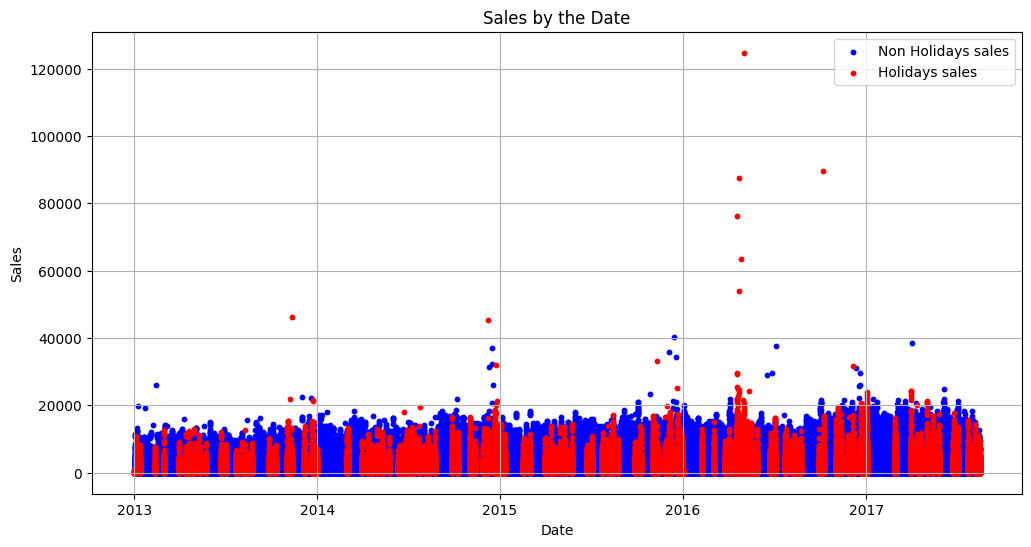

In [36]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define a condition for the colors
condition = (df['holidayTransferred_True'] == False) & (df['holidayTransferred_False'] == False)

# Plot the points in blue if the condition is met, and red otherwise
plt.scatter(
    df[condition]['date'], df[condition]['sales'],
    label='Non Holidays sales', marker='o', s=10, color='blue'
)
plt.scatter(
    df[~condition]['date'], df[~condition]['sales'],
    label='Holidays sales', marker='o', s=10, color='red'
)

# Set labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the Date')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

* From the graph we can see that those crazy outliers are just because of holidays not wrong data or something like that (So we keep it).

# Adding lag Features:

* Because each date have data for all values we need to split by store first

# Resplit the dataframe to train and test:

In [37]:
train = df[df['date']<='15-08-2017'].reset_index(drop=True)
test = df[df['date']>'15-08-2017'].reset_index(drop=True)

# X,y split and train val test splits

In [38]:
train

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True
0,0,2013-01-01,1,0.000,0,2013,1,1,1,True,...,False,False,True,False,False,False,True,False,True,False
1,1,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
2,2,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
3,3,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
4,4,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,438.133,0,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000884,3000884,2017-08-15,9,154.553,1,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000885,3000885,2017-08-15,9,2419.729,148,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000886,3000886,2017-08-15,9,121.000,8,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False


In [39]:
# Drop the 'id' column
train.drop('id', axis=1, inplace=True)

# Define the date for the split
split_date = '2017-08-01' # we got 15 days only for val since our test set is 16 days only

# Create training and validation sets
train_set = train[train['date'] < split_date]
val_set = train[train['date'] >= split_date]

train_set.drop('date', axis=1, inplace=True)
val_set.drop('date', axis=1, inplace=True)

# Define X and y for training and validation
X_train = train_set.drop('sales', axis=1)  # Features for training
y_train = train_set['sales']  # Target for training
X_val = val_set.drop('sales', axis=1)  # Features for validation
y_val = val_set['sales']  # Target for validation

/tmp/ipykernel_32/645909009.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop('date', axis=1, inplace=True)
/tmp/ipykernel_32/645909009.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set.drop('date', axis=1, inplace=True)


In [40]:
test_set_date = test.copy().drop('sales', axis=1)

X_test=test.drop(['id','sales','date'], axis=1)

# Normalize the data:

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform X_val and X_test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# The model:

## 1. XGBoost regressor: (score 1.45784)

In [43]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_eastimators=1000,early_stopping_rounds=50,learning_rate=0.1)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_val,y_val)],
       verbose=10)

[19:37:18] WARNING: ../src/learner.cc:767: 
Parameters: { "n_eastimators" } are not used.

[0]	validation_0-rmse:1067.79608	validation_1-rmse:1218.67491
[10]	validation_0-rmse:608.39327	validation_1-rmse:624.31024
[20]	validation_0-rmse:495.77317	validation_1-rmse:460.76499
[30]	validation_0-rmse:456.80155	validation_1-rmse:417.49284
[40]	validation_0-rmse:428.57022	validation_1-rmse:393.29809
[50]	validation_0-rmse:409.50828	validation_1-rmse:377.42565
[60]	validation_0-rmse:397.24612	validation_1-rmse:368.84151
[70]	validation_0-rmse:387.00965	validation_1-rmse:361.27588
[80]	validation_0-rmse:377.92862	validation_1-rmse:353.56164
[90]	validation_0-rmse:369.87311	validation_1-rmse:345.95919
[99]	validation_0-rmse:366.09757	validation_1-rmse:343.36887


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_eastimators=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

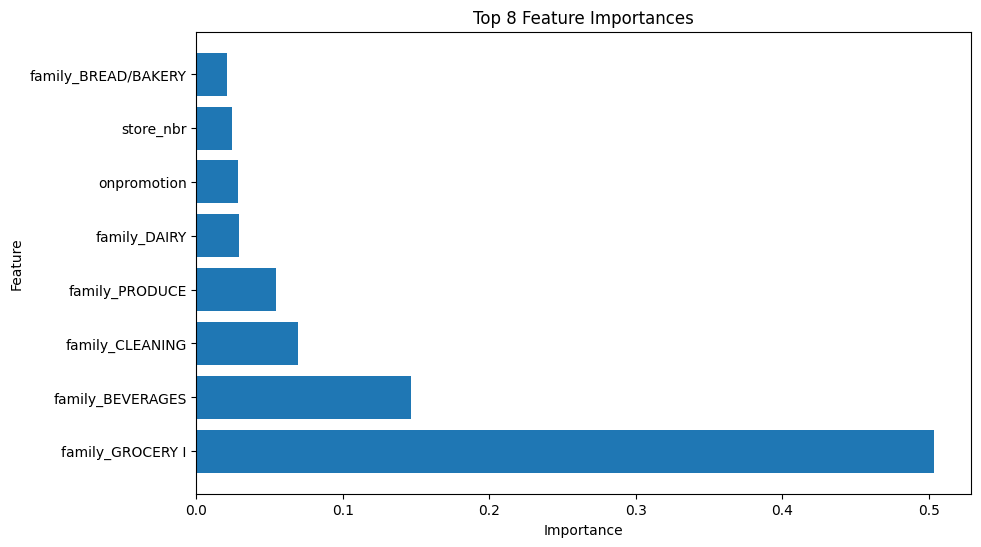

In [60]:
# Get feature importances
feature_importances = reg.feature_importances_

# Assuming you have a DataFrame named "train" and you want to exclude the 'date' and 'sales' columns
# Get the feature names (column names) from the DataFrame
feature_names = train.drop(columns=['date', 'sales']).columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select only the top 8 features
top_8_features = importance_df.head(8)

# Create a bar plot to visualize feature importances for the top 8 features
plt.figure(figsize=(10, 6))
plt.barh(top_8_features['Feature'], top_8_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 8 Feature Importances')
plt.show()

## 2. DNN:

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Ensure that the data types are appropriate (e.g., float32)
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model with a suitable loss function and optimizer
model.compile(optimizer='adam', loss='mean_squared_error')  # You can adjust the loss function

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
92943/92943 [==============================] - 240s 3ms/step - loss: 568833.0625 - val_loss: 421154.9062
Epoch 2/100
92943/92943 [==============================] - 234s 3ms/step - loss: 484933.0938 - val_loss: 458425.4062
Epoch 3/100
92943/92943 [==============================] - 238s 3ms/step - loss: 468557.1250 - val_loss: 374687.8438
Epoch 4/100
92943/92943 [==============================] - 236s 3ms/step - loss: 399681.6250 - val_loss: 299337.2188
Epoch 5/100
92943/92943 [==============================] - 238s 3ms/step - loss: 360624.4688 - val_loss: 369931.5625
Epoch 6/100
92943/92943 [==============================] - 231s 2ms/step - loss: 346902.6562 - val_loss: 281317.7500
Epoch 7/100
92943/92943 [==============================] - 231s 2ms/step - loss: 336292.4062 - val_loss: 298240.2500
Epoch 8/100
92943/92943 [==============================] - 231s 2ms/step - loss: 327488.4062 - val_loss: 277478.9062
Epoch 9/100
92943/92943 [==============================] - 231s 

In [160]:
model.save('/kaggle/working/dnn.h5')
# model = keras.models.load_model('/kaggle/working/dnn.h5')

# Make predictions:

In [149]:
y_test_pred.shape

(28512, 1)

In [152]:
# 1. Make predictions on X_test
# y_test_pred = reg.predict(X_test)

X_test=X_test.astype(np.float32)
y_test_pred = model.predict(X_test)

# 2. Create a new dataframe with id and sales predictions

# Assuming test dataframe has an 'id' column
predictions_df = pd.DataFrame({'id': test['id'], 'sales': y_test_pred.flatten()})

# 3. Optionally, ensure non-negative sales predictions (adjust as needed)
predictions_df['sales'] = predictions_df['sales'].clip(lower=0)  # Clip negative values to 0

# Display the predictions dataframe
print(predictions_df)

891/891 [==============================] - 2s 2ms/step
            id        sales
0      3000888     0.000000
1      3000889     0.000000
2      3000890     0.000000
3      3000891  2316.071289
4      3000892     0.000000
...        ...          ...
28507  3029395   238.146286
28508  3029396    24.296673
28509  3029397  1620.731201
28510  3029398    17.422649
28511  3029399     0.000000

[28512 rows x 2 columns]


# Plot predictions:

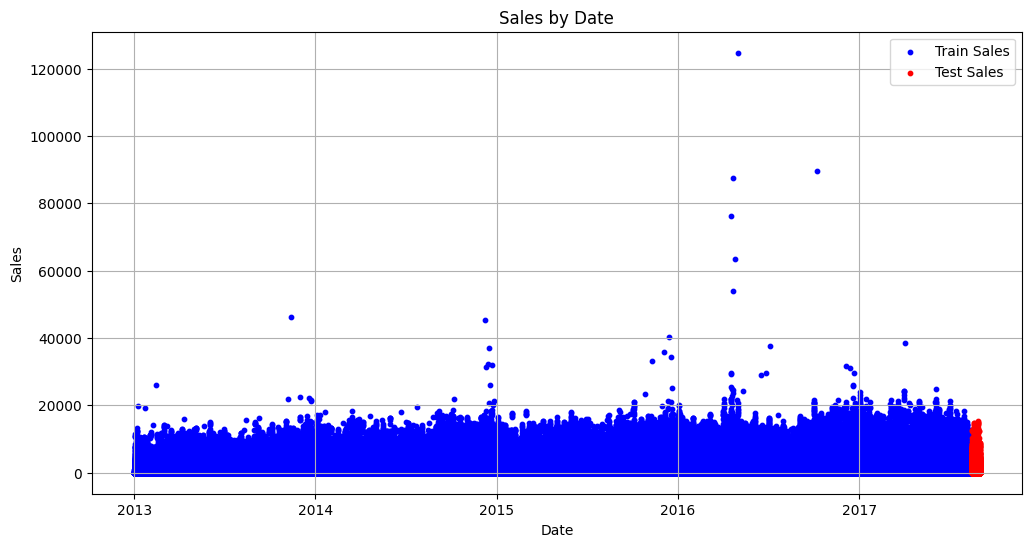

In [136]:
test_set_date=test_set_date.merge(predictions_df,how='left',on='id')

# Plot the "train" dataframe in blue
plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

# Plot the "test_set_date" dataframe in red
plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


In [158]:
test_set_date.drop(columns=['sales_x','sales_y'], inplace=True)

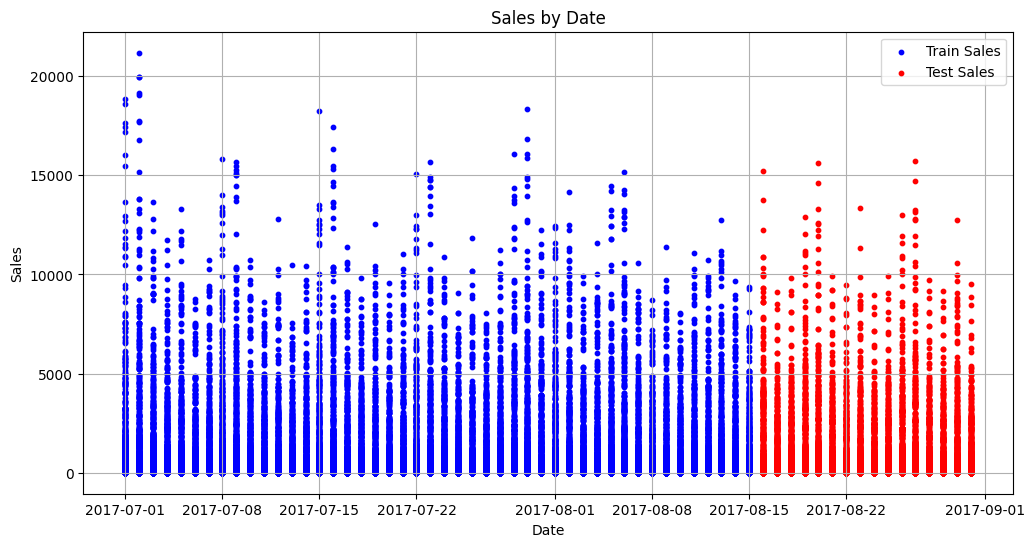

In [159]:
test_set_date=test_set_date.merge(predictions_df,how='left',on='id')

# Plot the "train" dataframe in blue
plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

# Plot the "test_set_date" dataframe in red
plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


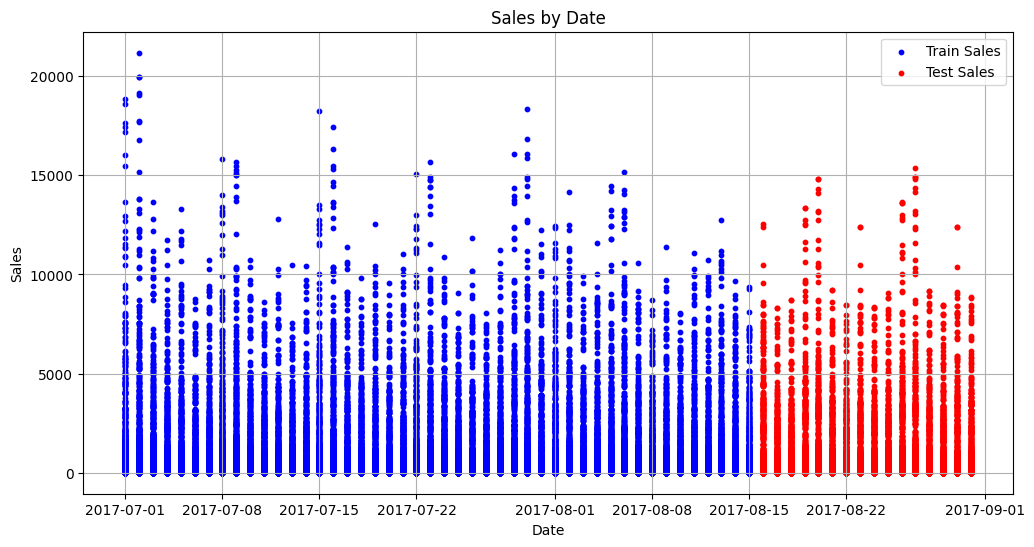

In [138]:
train=train[train['date']>='07-01-2017']

# Plot the "train" dataframe in blue
plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

# Plot the "test_set_date" dataframe in red
plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


# Export predictions:

In [155]:
# Exporting to csv
predictions_df.to_csv('/kaggle/working/pred.csv', index=False)

In [156]:
pd.read_csv('/kaggle/working/pred.csv')

,id,sales
0,3000888,0.000000
1,3000889,0.000000
2,3000890,0.000000
3,3000891,2316.071300
4,3000892,0.000000
...,...,...
28507,3029395,238.146290
28508,3029396,24.296673
28509,3029397,1620.731200
28510,3029398,17.422650
